In [6]:
# Check if labels correlate with experience time
import pandas as pd

df = pd.read_csv("cleaned_resumes.csv")

# Convert experience time to numeric
df["years"] = df["total_experience_time"].str.replace(" Years", "").astype(float)

# Group by experience level and show stats
print("Experience Time Distribution by Seniority Level:")
print("="*60)
print(df.groupby("experience_level")["years"].describe())
print("\n")
print("Mean years by level:")
print(df.groupby("experience_level")["years"].mean().sort_values())


Experience Time Distribution by Seniority Level:
                  count       mean       std    min      25%     50%     75%  \
experience_level                                                               
junior            700.0   4.854714  2.746820   0.13   2.9500   4.300   5.995   
mid               700.0   9.486514  2.268762   6.37   7.6875   9.125  10.980   
senior            700.0  12.162843  1.534945  10.10  10.9175  11.795  13.110   

                    max  
experience_level         
junior            14.69  
mid               19.44  
senior            18.81  


Mean years by level:
experience_level
junior     4.854714
mid        9.486514
senior    12.162843
Name: years, dtype: float64


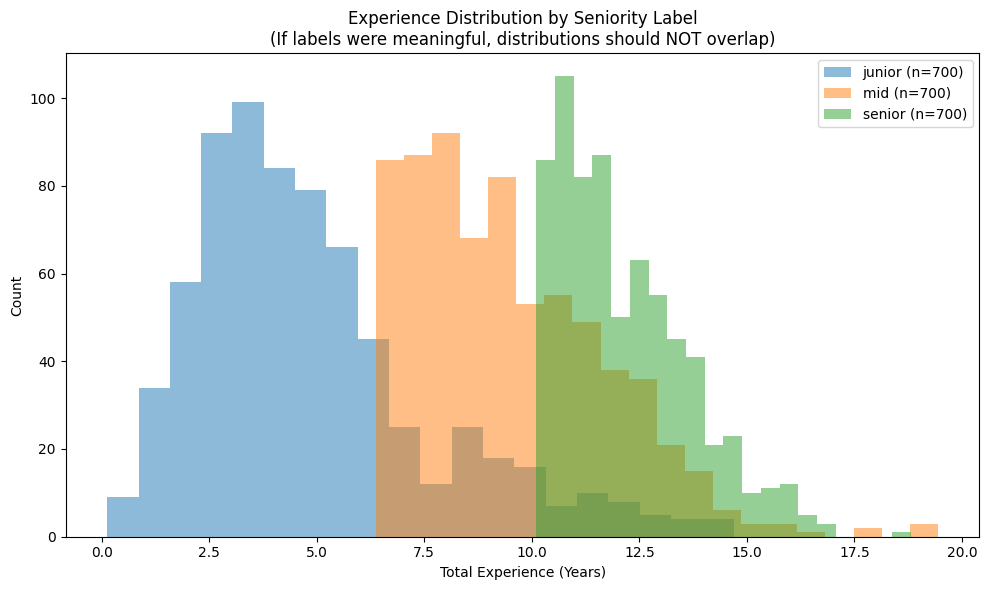


Overlap Analysis:
junior: min=0.1, max=14.7, mean=4.9
mid: min=6.4, max=19.4, mean=9.5
senior: min=10.1, max=18.8, mean=12.2


In [7]:
# Visualize the overlap
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))

for level in ["junior", "mid", "senior"]:
    subset = df[df["experience_level"] == level]["years"]
    ax.hist(subset, bins=20, alpha=0.5, label=f"{level} (n={len(subset)})")

ax.set_xlabel("Total Experience (Years)")
ax.set_ylabel("Count")
ax.set_title("Experience Distribution by Seniority Label\n(If labels were meaningful, distributions should NOT overlap)")
ax.legend()
plt.tight_layout()
plt.show()

# Check overlap
print("\nOverlap Analysis:")
for level in ["junior", "mid", "senior"]:
    subset = df[df["experience_level"] == level]["years"]
    print(f"{level}: min={subset.min():.1f}, max={subset.max():.1f}, mean={subset.mean():.1f}")
